# Simple Regression Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("fast")

In [3]:
raw_data = pd.read_csv("data/advertising.csv", index_col=False)
raw_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
raw_data = raw_data.drop("Unnamed: 0", axis=1)
raw_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
raw_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Set `sales` as dependent variable

In [6]:
Y = raw_data["sales"]

## Correlation Between Variables

<Axes: >

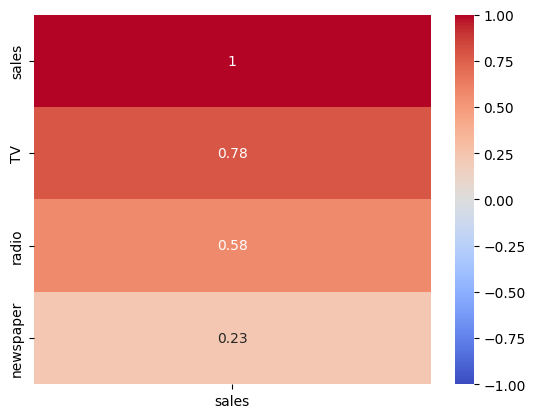

In [7]:
sns.heatmap(
    raw_data.corr()[['sales']].sort_values(by=['sales'],ascending=False),
    vmin=-1,
    cmap='coolwarm',
    annot=True
)

Text(0.5, 1.0, 'Newspaper and Sales')

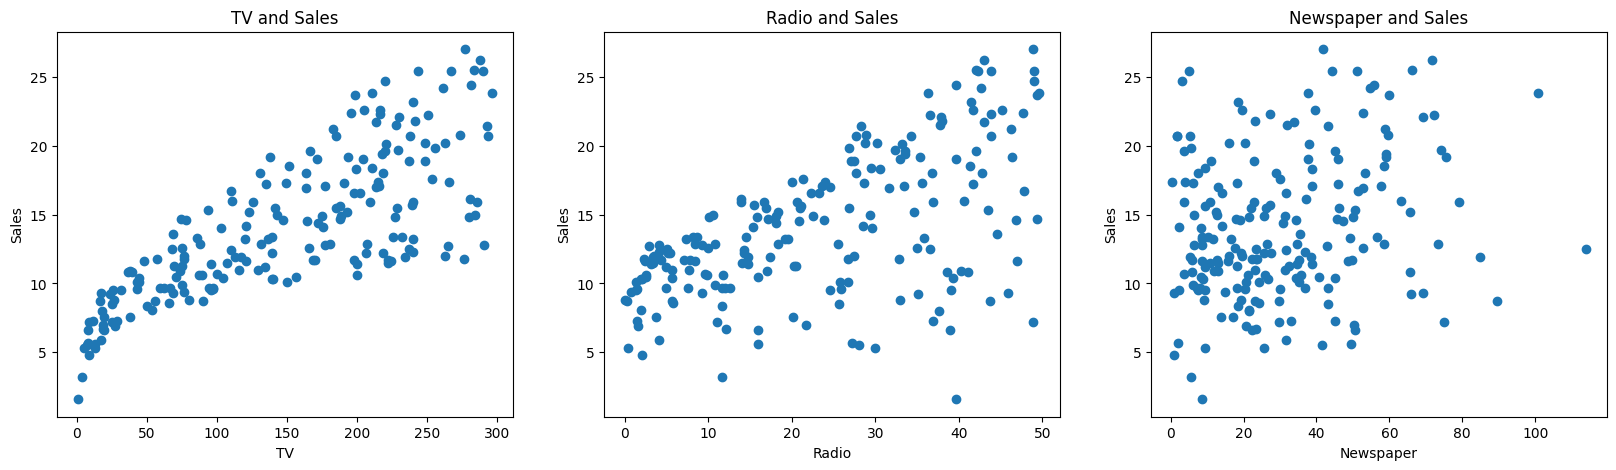

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(raw_data["TV"], Y)
axs[0].set_xlabel("TV")
axs[0].set_ylabel("Sales")
axs[0].set_title("TV and Sales")
axs[1].scatter(raw_data["radio"], Y)
axs[1].set_xlabel("Radio")
axs[1].set_ylabel("Sales")
axs[1].set_title("Radio and Sales")
axs[2].scatter(raw_data["newspaper"], Y)
axs[2].set_xlabel("Newspaper")
axs[2].set_ylabel("Sales")
axs[2].set_title("Newspaper and Sales")

### Set independent variable

In [9]:
X = raw_data["TV"]

## Equation for Simple Linear Regression

In this equation we calculte the intercept and slope, which in this equation we call $\beta_0$ and $\beta_1$

\begin{align}
&\hat{y} = \beta_0 + \beta_1 \cdot X, \\
&\beta_0 = \sum_{i=0}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{(x_i - \bar{x})^2} \\
&\beta_1 = \bar{y} - \beta_1 \cdot \bar{x} \\
\end{align}

In [10]:
meanY = Y.mean()
meanX = X.mean()

b0 = 0
b1 = 0
A, B = 0, 0

for i in range(200):
    Xi = X.loc[i]
    Yi = Y.loc[i]
    A += (Xi - meanX) * (Yi - meanY)
    B += pow(Xi - meanX, 2)

b1 = A / B
print("Slope (B0): ", b1)

b0 = meanY - (b1 * meanX)
print("Intercept (B1): ", b0)

Slope (B0):  0.04753664043301969
Intercept (B1):  7.032593549127704


In [11]:
prediction = []
for i in range(200):
    prediction.append((b0 + b1 * X[i]))
prediction = np.array(prediction)

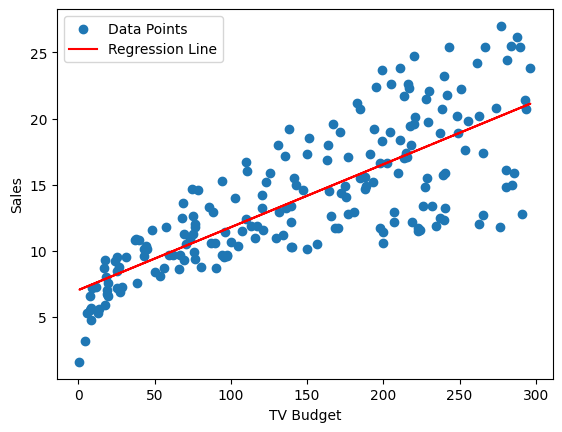

In [15]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.scatter(X, Y, label="Data Points")
ax.plot(X, prediction, color="r", label="Regression Line")
ax.set_ylabel("Sales")
ax.set_xlabel("TV Budget")

plt.legend()
plt.show()

In [13]:
def predict(X):
    y_hat = b0 + b1 * X
    return y_hat

In [17]:
tv_advertise_buedget = float(input("Budget for TV Advertisement(in thousand dollar):")) # in thousands of dollars

sales_unit = round(predict(tv_advertise_buedget), 2) # in thousands of units

print(f"For ${tv_advertise_buedget * 1000} TV Advertise Budget, {round(sales_unit * 1000, 0)} units will be sold.")

Budget for TV Advertisement(in thousand dollar): 25


For $25000.0 TV Advertise Budget, 8220.0 units will be sold.
